In [195]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import math
from sklearn import svm

In [84]:
loan=pd.read_csv("/Users/souravghoshhansda/Library/CloudStorage/OneDrive-Personal/data_exploration_ml/loan.csv")

In [85]:
loan.head()

,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval_Status
0,LP00031,Male,Yes,0,Graduate,No,9329,0,Rural,189.0,180.0,1.0,Y
1,LP00032,Male,Yes,2,Graduate,No,2043,1619,Rural,102.0,360.0,1.0,Y
2,LP00033,Male,Yes,0,Graduate,No,4754,2331,Urban,129.0,360.0,1.0,Y
3,LP00034,Male,No,0,Not Graduate,No,2721,0,Urban,59.0,180.0,1.0,Y
4,LP00035,Male,Yes,0,Graduate,No,2998,3419,Semiurban,56.0,180.0,1.0,Y


In [86]:
loan.describe()

,Applicant_Income,Coapplicant_Income,Amount_Requested,Term,Credit_History
count,610.000000,610.000000,592.000000,596.000000,560.000000
mean,5415.578689,1622.114754,146.459459,341.879195,0.841071
std,6126.143268,2935.113192,85.597858,65.322153,0.365936
min,147.000000,0.000000,9.000000,12.000000,0.000000
25%,2882.750000,0.000000,101.000000,360.000000,1.000000
50%,3813.000000,1150.000000,127.500000,360.000000,1.000000
75%,5793.750000,2299.500000,167.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [87]:
loan.isnull().sum()

Loan_ID                  0
Gender                  13
Marital_Status           3
Number_of_Dependents    15
Education_Level          0
Independent_Worker      32
Applicant_Income         0
Coapplicant_Income       0
Location                 0
Amount_Requested        18
Term                    14
Credit_History          50
Approval_Status          0
dtype: int64

In [88]:
loan.Gender.value_counts()

Gender
Male      485
Female    112
Name: count, dtype: int64

In [89]:
loan.Marital_Status.value_counts()

Marital_Status
Yes    395
No     212
Name: count, dtype: int64

In [90]:
loan.Number_of_Dependents.value_counts()

Number_of_Dependents
0     343
1     101
2     100
3+     51
Name: count, dtype: int64

In [91]:
loan.Independent_Worker.value_counts()

Independent_Worker
No     496
Yes     82
Name: count, dtype: int64

In [92]:
loan.Amount_Requested.value_counts()

Amount_Requested
129.0    12
111.0    10
109.0    10
136.0     9
119.0     9
         ..
49.0      1
260.0     1
325.0     1
308.0     1
700.0     1
Name: count, Length: 218, dtype: int64

In [93]:
loan.Term.value_counts()

Term
360.0    508
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: count, dtype: int64

In [94]:
loan.Credit_History.value_counts()

Credit_History
1.0    471
0.0     89
Name: count, dtype: int64

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Approval_Status', ylabel='count'>

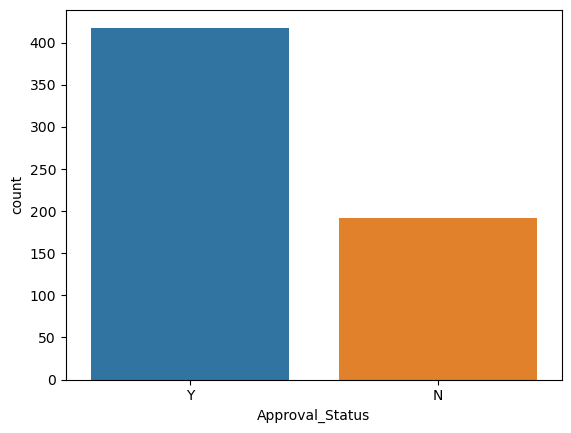

In [95]:
sns.countplot(x='Approval_Status',data=loan)

In [96]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in loan.columns: #Iterates through each column in the DataFrame.
    if len(loan[column].unique()) <= 30:#Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {loan[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {loan[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

Gender : ['Male' 'Female' nan]
Gender : Gender
Male      485
Female    112
Name: count, dtype: int64
Marital_Status : ['Yes' 'No' nan]
Marital_Status : Marital_Status
Yes    395
No     212
Name: count, dtype: int64
Number_of_Dependents : ['0' '2' '1' '3+' nan]
Number_of_Dependents : Number_of_Dependents
0     343
1     101
2     100
3+     51
Name: count, dtype: int64
Education_Level : ['Graduate' 'Not Graduate']
Education_Level : Education_Level
Graduate        478
Not Graduate    132
Name: count, dtype: int64
Independent_Worker : ['No' 'Yes' nan]
Independent_Worker : Independent_Worker
No     496
Yes     82
Name: count, dtype: int64
Location : ['Rural' 'Urban' 'Semiurban']
Location : Location
Semiurban    233
Urban        200
Rural        177
Name: count, dtype: int64
Term : [180. 360. 480.  nan 300.  36.  84. 240.  12. 120.  60.]
Term : Term
360.0    508
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: count, 

In [97]:
categorical_col

['Gender',
 'Marital_Status',
 'Number_of_Dependents',
 'Education_Level',
 'Independent_Worker',
 'Location',
 'Term',
 'Credit_History',
 'Approval_Status']

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshha

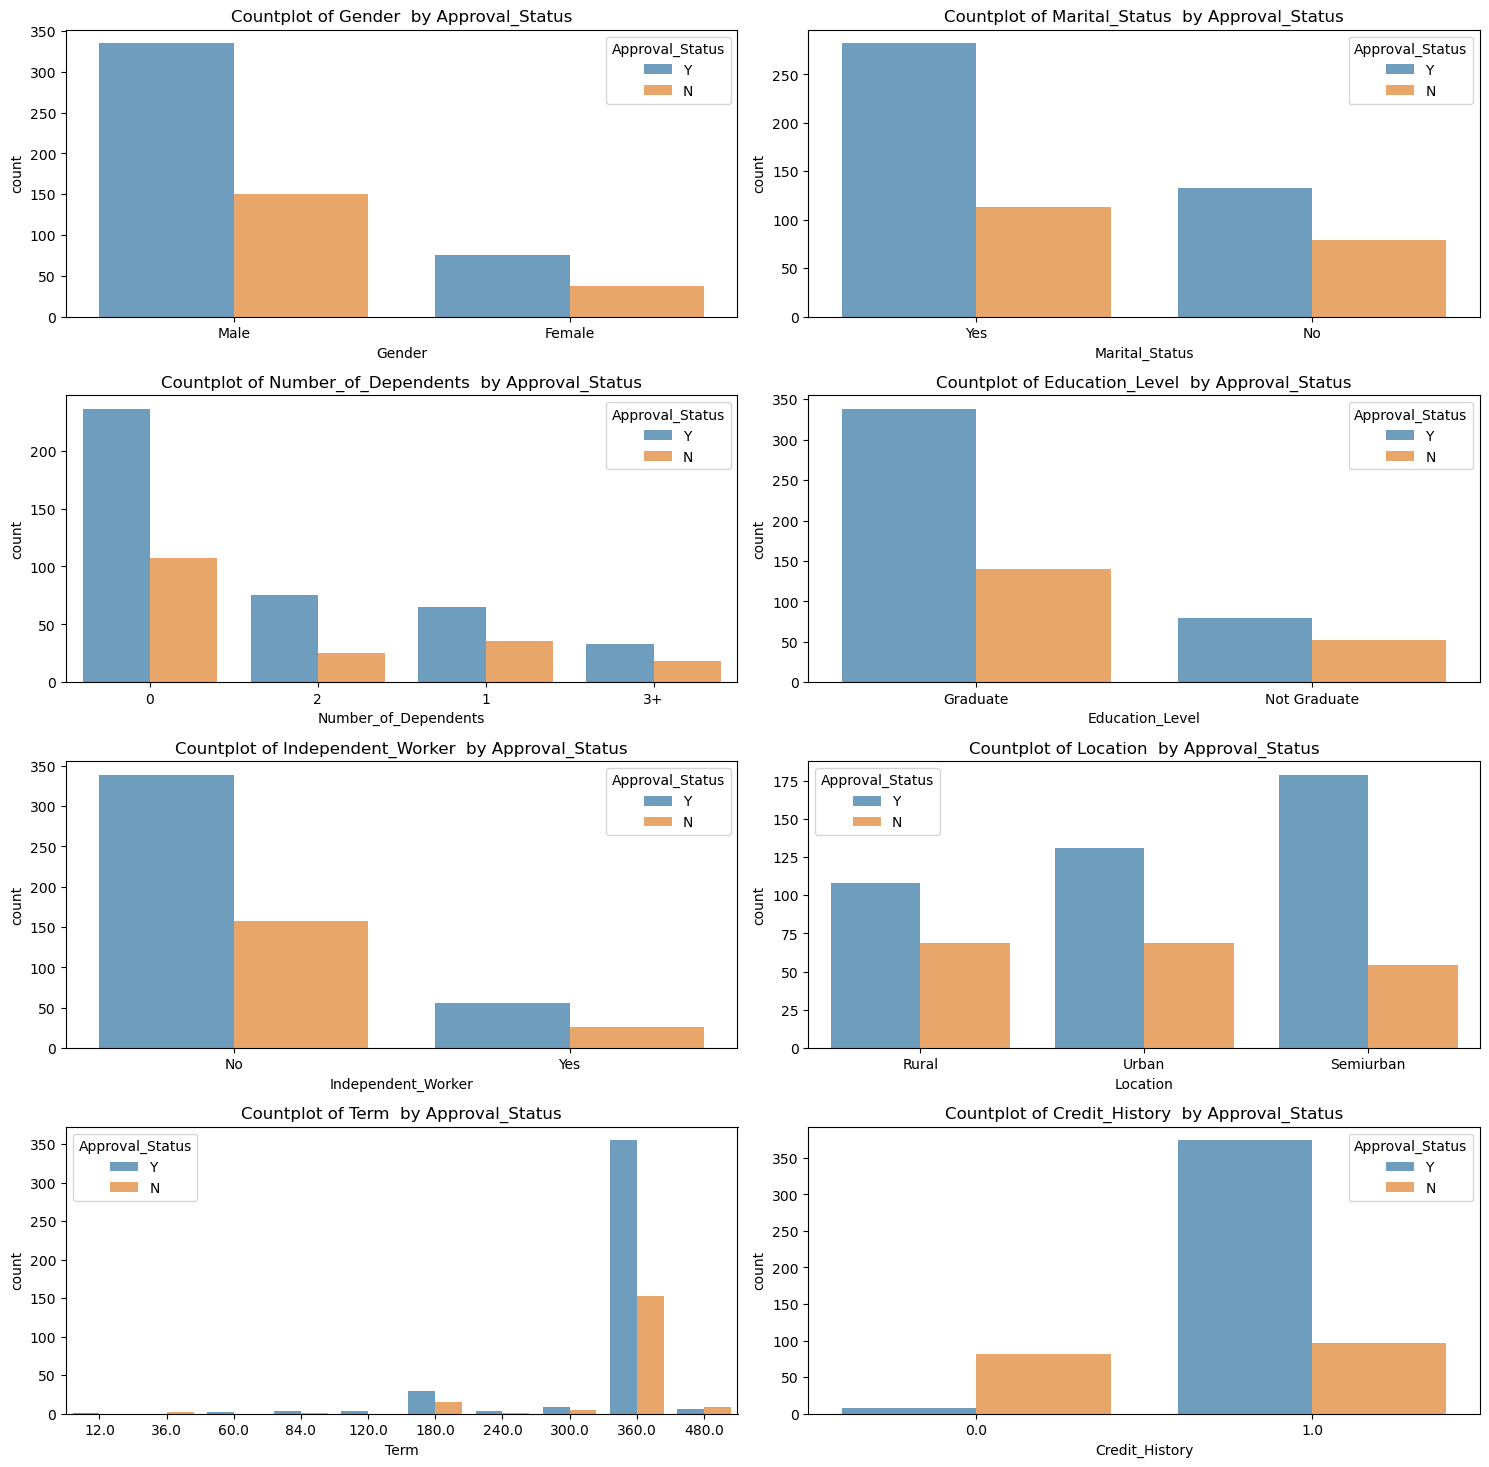

In [98]:
plt.figure(figsize=[15,18])
features = ['Gender','Marital_Status','Number_of_Dependents','Education_Level', 
            'Independent_Worker', 'Location','Term','Credit_History']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='Approval_Status', alpha=0.7, data=loan)
    plt.title("Countplot of {}  by Approval_Status".format(f))
    n=n+1
plt.tight_layout()
plt.show()

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshha

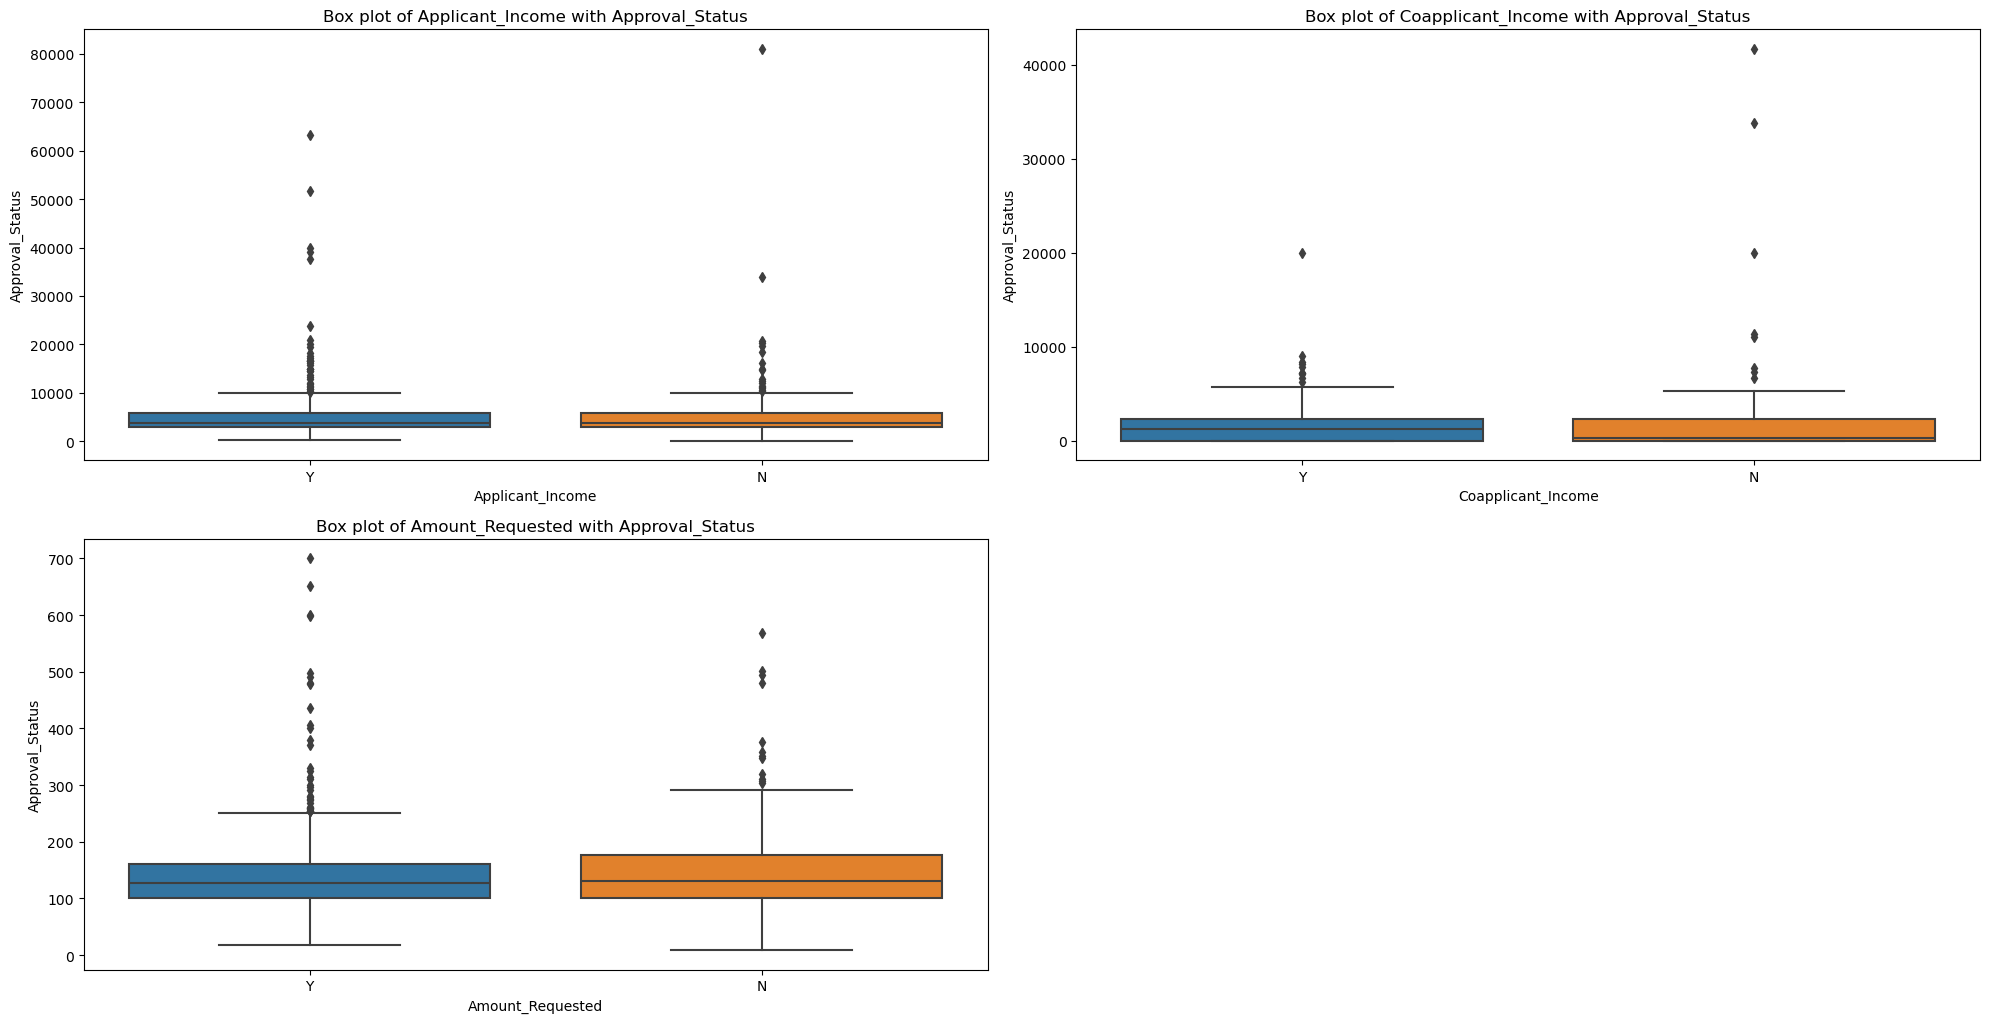

In [99]:
features = ['Applicant_Income', 'Coapplicant_Income','Amount_Requested']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)#5rows, 2 columns
    sns.boxplot(y=feature, x='Approval_Status', data=loan)
    plt.title(f'Box plot of {feature} with Approval_Status')
    plt.xlabel(feature)
    plt.ylabel('Approval_Status')

plt.tight_layout()
plt.show()

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Credit_History', ylabel='Applicant_Income'>

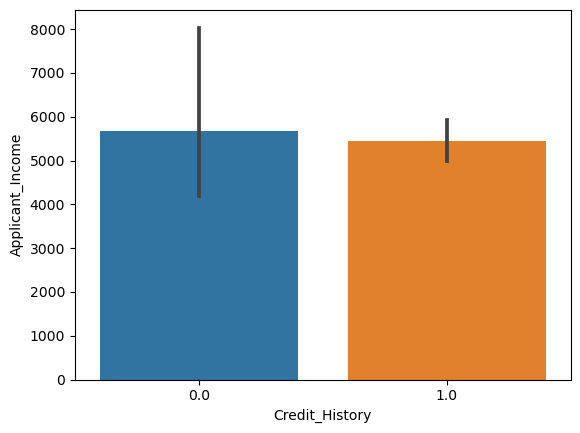

In [100]:
sns.barplot(x='Credit_History',y='Applicant_Income',data=loan)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Credit_History', ylabel='Coapplicant_Income'>

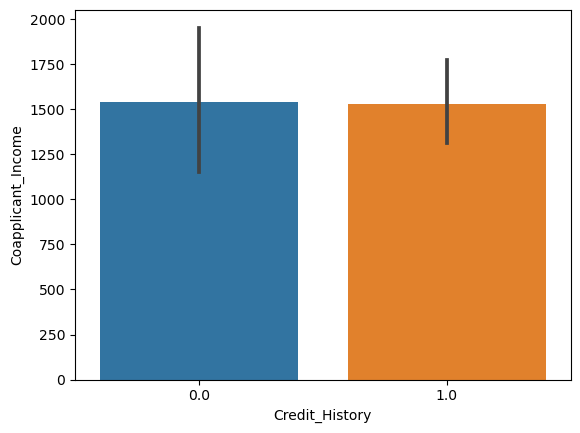

In [101]:
sns.barplot(x='Credit_History',y='Coapplicant_Income',data=loan)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Credit_History', ylabel='Amount_Requested'>

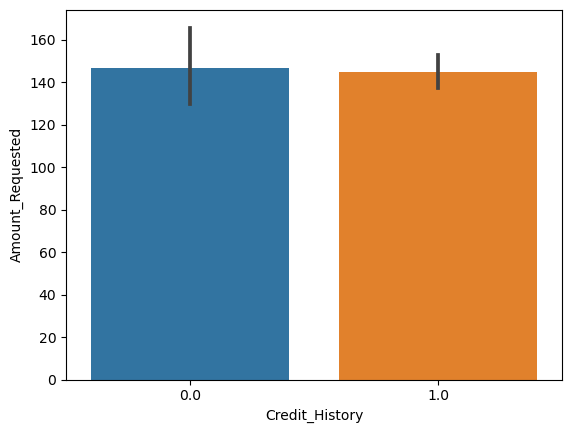

In [102]:
sns.barplot(x='Credit_History',y='Amount_Requested',data=loan)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Term', ylabel='Applicant_Income'>

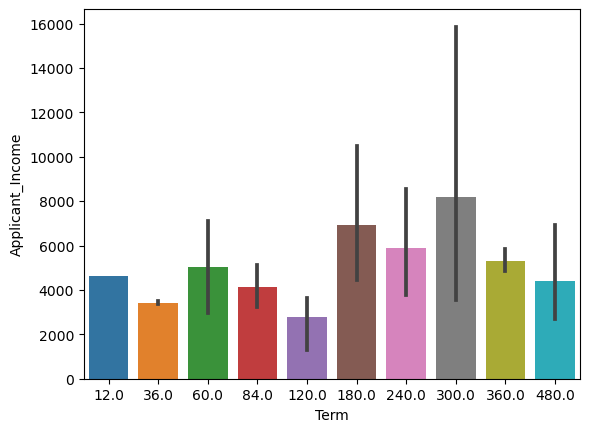

In [103]:
sns.barplot(x='Term',y='Applicant_Income',data=loan)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Term', ylabel='Applicant_Income'>

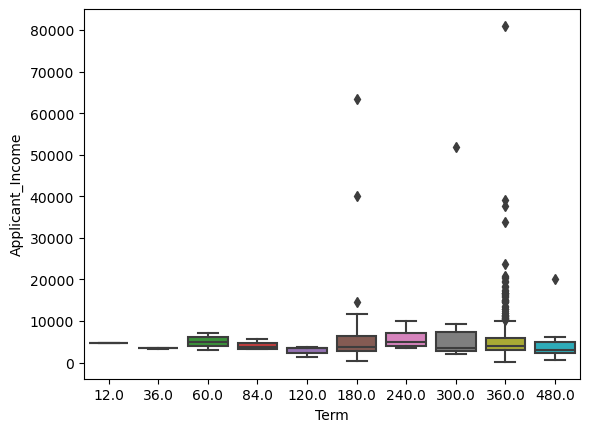

In [104]:
sns.boxplot(x='Term',y='Applicant_Income',data=loan)

Text(0, 0.5, 'Number_of_Dependents')

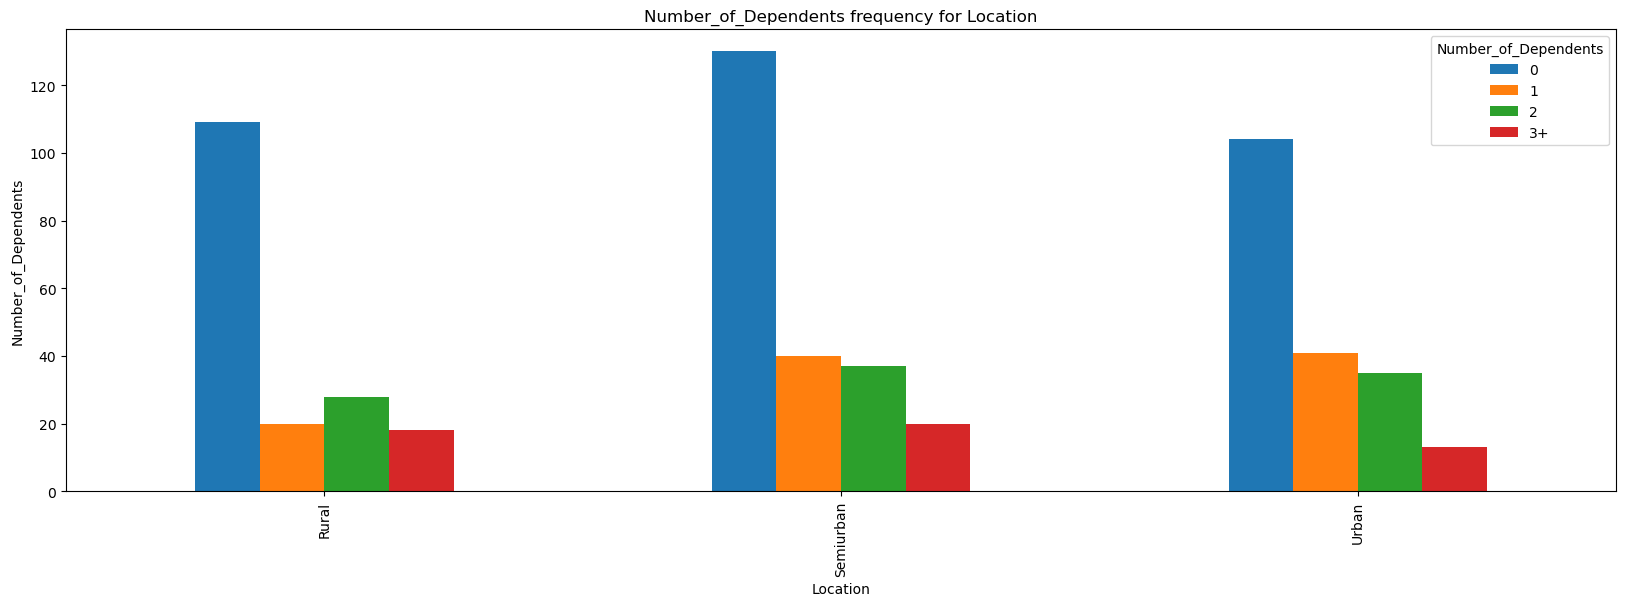

In [105]:
#check the overall distribution of Location vs Number_of_Dependents using crosstab
pd.crosstab(loan.Location,loan.Number_of_Dependents).plot(kind="bar",figsize=(20,6))
plt.title('Number_of_Dependents frequency for Location')
plt.xlabel('Location')
plt.ylabel('Number_of_Dependents')

Text(0, 0.5, 'Education_Level')

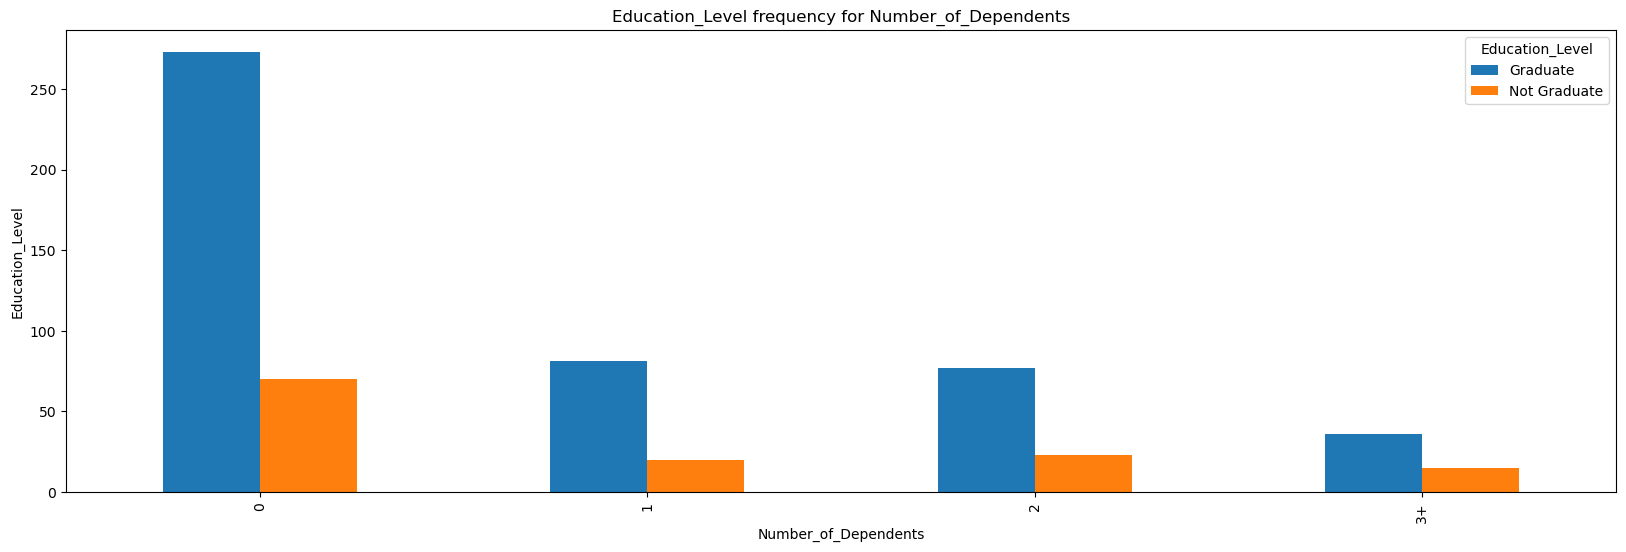

In [106]:
#check the overall distribution of Number_of_Dependents vs Education_Level using crosstab
pd.crosstab(loan.Number_of_Dependents,loan.Education_Level).plot(kind="bar",figsize=(20,6))
plt.title('Education_Level frequency for Number_of_Dependents')
plt.xlabel('Number_of_Dependents')
plt.ylabel('Education_Level')

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Independent_Worker', ylabel='Applicant_Income'>

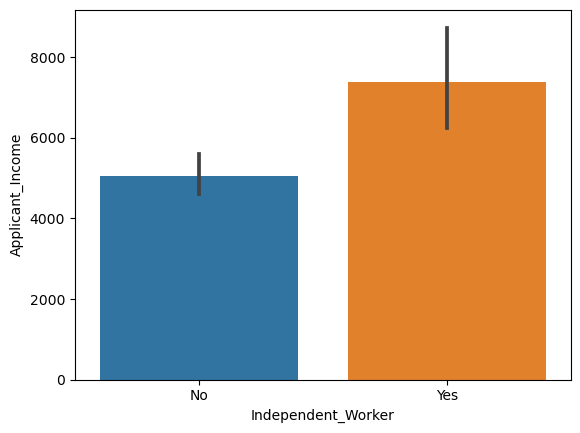

In [107]:
sns.barplot(x='Independent_Worker',y='Applicant_Income',data=loan)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Independent_Worker', ylabel='Coapplicant_Income'>

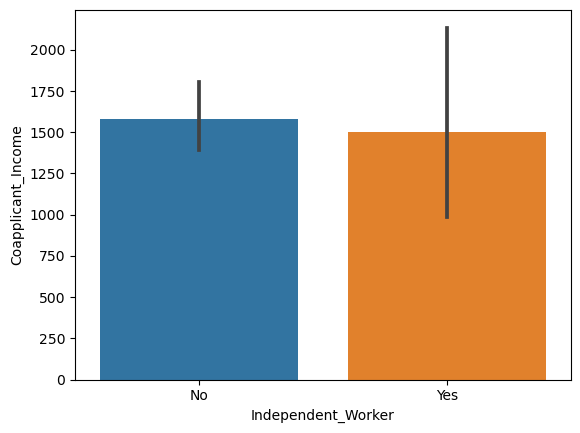

In [108]:
sns.barplot(x='Independent_Worker',y='Coapplicant_Income',data=loan)

Text(0, 0.5, 'Credit_History')

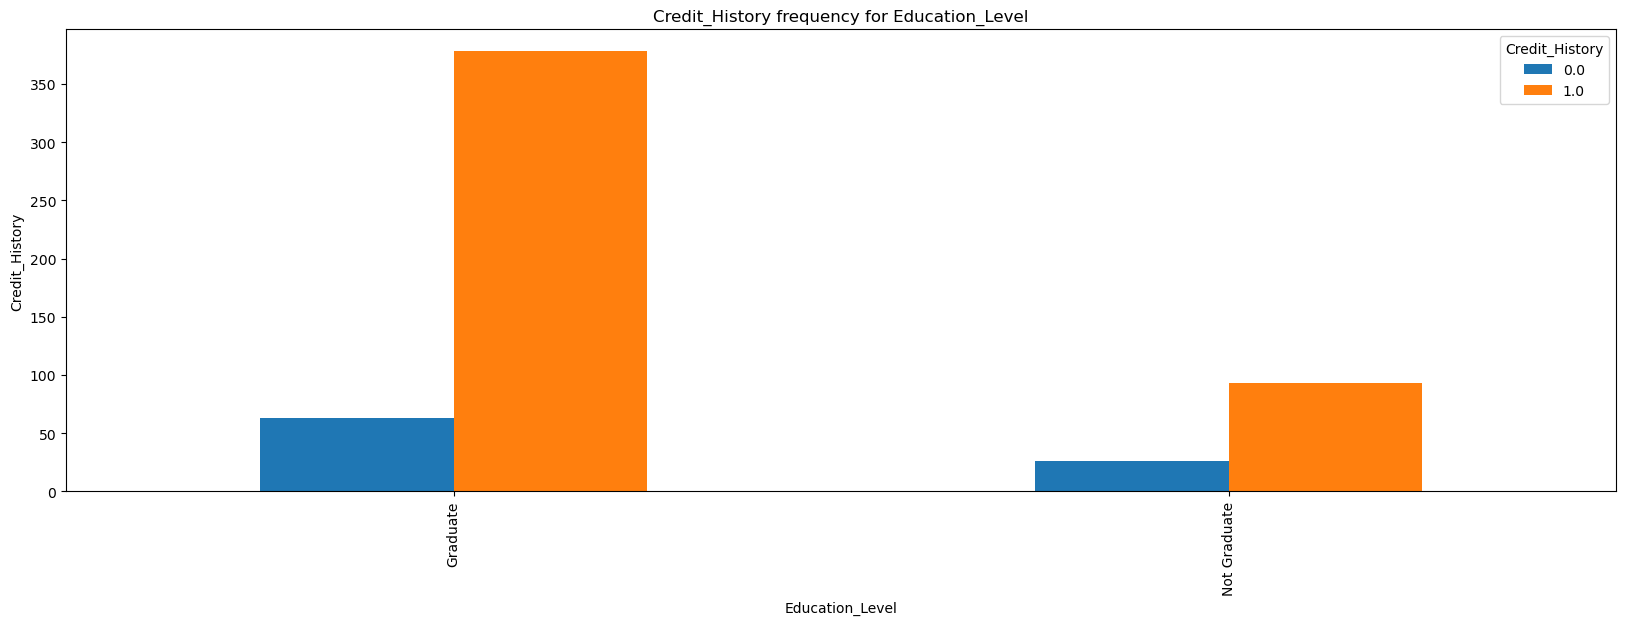

In [109]:
#check the overall distribution of Education_Level vs Credit_History using crosstab
pd.crosstab(loan.Education_Level,loan.Credit_History).plot(kind="bar",figsize=(20,6))
plt.title('Credit_History frequency for Education_Level')
plt.xlabel('Education_Level')
plt.ylabel('Credit_History')

In [110]:
def pie_chart(data,col):
        targets = list(data[col].value_counts().index)
        values = list((data[col].value_counts()*100/len(data[col])).values)
        fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)
        fig.show()

In [111]:
pie_chart(loan,"Gender")

In [112]:
pie_chart(loan,"Education_Level")

In [113]:
pie_chart(loan,"Marital_Status")

In [114]:
loan.groupby('Approval_Status').median(numeric_only=True)

,Applicant_Income,Coapplicant_Income,Amount_Requested,Term,Credit_History
Approval_Status,,,,,
N,3833.5,267.5,130.0,360.0,1.0
Y,3813.0,1223.0,127.0,360.0,1.0


In [115]:
loan.dtypes

Loan_ID                  object
Gender                   object
Marital_Status           object
Number_of_Dependents     object
Education_Level          object
Independent_Worker       object
Applicant_Income          int64
Coapplicant_Income        int64
Location                 object
Amount_Requested        float64
Term                    float64
Credit_History          float64
Approval_Status          object
dtype: object

In [116]:
loan.Loan_ID = loan.Loan_ID.apply(lambda x: int(x.split('LP')[1]))
loan.Loan_ID

0       31
1       32
2       33
3       34
4       35
      ... 
605    636
606    637
607    638
608    639
609    640
Name: Loan_ID, Length: 610, dtype: int64

In [117]:
for column in loan.columns:
    if loan[column].dtype == 'object':
        loan[column].fillna(loan[column].mode()[0], inplace=True)
    else:
        loan[column].fillna(loan[column].median(), inplace=True)

In [118]:
loan.isnull().sum()

Loan_ID                 0
Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education_Level         0
Independent_Worker      0
Applicant_Income        0
Coapplicant_Income      0
Location                0
Amount_Requested        0
Term                    0
Credit_History          0
Approval_Status         0
dtype: int64

In [119]:
#Gender-Label
#Marital_Status-Label
#Education_Level-Label
#Independent_Worker-Label
#Location-One_Hot
#Approval_Status-Label
#Number_of_Dependents-Ordinal

In [120]:
categorical_label_encoder=['Gender','Marital_Status','Independent_Worker','Education_Level','Approval_Status']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_label_encoder:
    loan[column] = label_encoder.fit_transform(loan[column])

In [121]:
ordinal_Number_of_Dependents={'0':0, '1':1, '2':2, '3+':3}
loan.Number_of_Dependents=loan.Number_of_Dependents.map(ordinal_Number_of_Dependents)

In [122]:
binary=OneHotEncoder(categories='auto')

In [123]:
loan= pd.get_dummies(data=loan, columns=['Location'], prefix=['Location'])

In [124]:
loan.isnull().sum()

Loan_ID                 0
Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education_Level         0
Independent_Worker      0
Applicant_Income        0
Coapplicant_Income      0
Amount_Requested        0
Term                    0
Credit_History          0
Approval_Status         0
Location_Rural          0
Location_Semiurban      0
Location_Urban          0
dtype: int64

In [125]:
loan.replace({True:1,False:0},inplace=True)

In [126]:
loan

,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Amount_Requested,Term,Credit_History,Approval_Status,Location_Rural,Location_Semiurban,Location_Urban
0,31,1,1,0,0,0,9329,0,189.0,180.0,1.0,1,1,0,0
1,32,1,1,2,0,0,2043,1619,102.0,360.0,1.0,1,1,0,0
2,33,1,1,0,0,0,4754,2331,129.0,360.0,1.0,1,0,0,1
3,34,1,0,0,1,0,2721,0,59.0,180.0,1.0,1,0,0,1
4,35,1,1,0,0,0,2998,3419,56.0,180.0,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,636,1,0,0,0,0,2934,0,97.0,360.0,1.0,1,0,1,0
606,637,1,1,0,0,0,2130,6662,69.0,180.0,1.0,0,0,1,0
607,638,1,1,3,0,0,51761,0,700.0,300.0,1.0,1,0,0,1
608,639,1,0,0,0,1,6401,0,201.0,360.0,1.0,1,1,0,0


In [127]:
#dividing the data set into x and y.
x_encoded=loan.drop('Approval_Status',axis=1)
y=loan['Approval_Status']

In [128]:
x_encoded

,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Amount_Requested,Term,Credit_History,Location_Rural,Location_Semiurban,Location_Urban
0,31,1,1,0,0,0,9329,0,189.0,180.0,1.0,1,0,0
1,32,1,1,2,0,0,2043,1619,102.0,360.0,1.0,1,0,0
2,33,1,1,0,0,0,4754,2331,129.0,360.0,1.0,0,0,1
3,34,1,0,0,1,0,2721,0,59.0,180.0,1.0,0,0,1
4,35,1,1,0,0,0,2998,3419,56.0,180.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,636,1,0,0,0,0,2934,0,97.0,360.0,1.0,0,1,0
606,637,1,1,0,0,0,2130,6662,69.0,180.0,1.0,0,1,0
607,638,1,1,3,0,0,51761,0,700.0,300.0,1.0,0,0,1
608,639,1,0,0,0,1,6401,0,201.0,360.0,1.0,1,0,0


In [129]:
y

0      1
1      1
2      1
3      1
4      1
      ..
605    1
606    0
607    1
608    1
609    0
Name: Approval_Status, Length: 610, dtype: int64

In [130]:
num_before=dict(Counter(y))
num_before

{1: 418, 0: 192}

In [131]:
smote=SMOTE()#saving the instance

In [132]:
x_smote,y_smote=smote.fit_resample(x_encoded,y)

In [133]:
num_after=dict(Counter(y_smote))
num_after

{1: 418, 0: 418}

In [134]:
after_smote=list(num_after.values())

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/sou

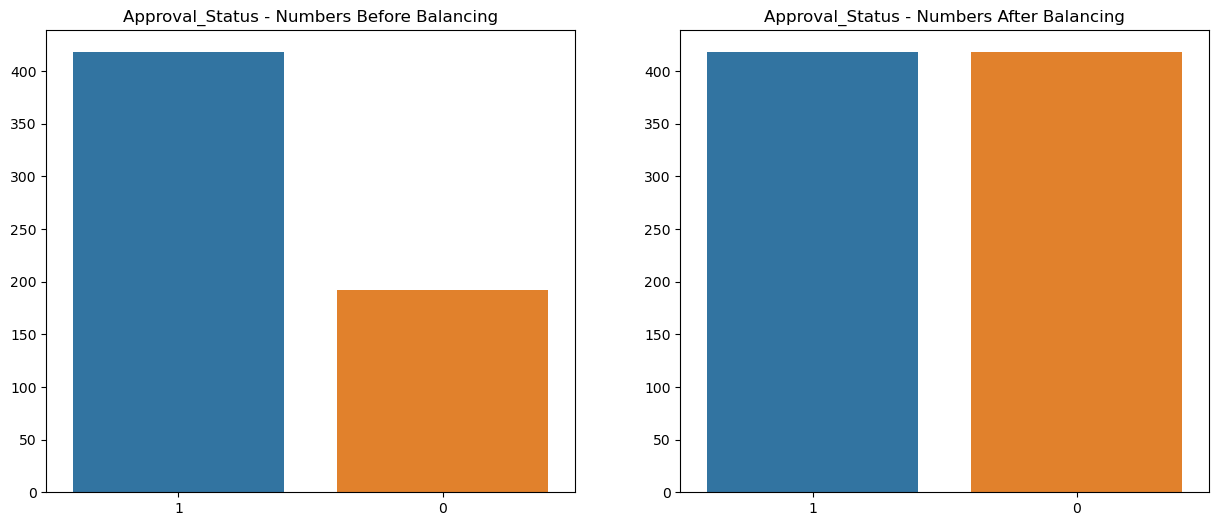

In [135]:
labels = ["1","0"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Approval_Status - Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=after_smote)
plt.title("Approval_Status - Numbers After Balancing")
plt.show()

In [136]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [137]:
x_train,x_test,y_train,y_test

(     Loan_ID  Gender  Marital_Status  Number_of_Dependents  Education_Level  \
 346      377       1               1                     3                0   
 462      493       1               1                     3                0   
 691      455       1               0                     0                0   
 302      333       0               1                     0                0   
 763      236       0               0                     0                0   
 ..       ...     ...             ...                   ...              ...   
 71       102       1               1                     3                0   
 106      137       0               0                     0                0   
 270      301       1               1                     2                0   
 435      466       1               1                     1                0   
 102      133       1               1                     2                0   
 
      Independent_Worker  Applicant_In

In [138]:
#Feature Scaling on x data(x_train & x_test)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [139]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', XGBClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [140]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.8273809523809523
Naive bayes : 0.7976190476190477
CART : 0.7380952380952381
Random Forest : 0.875
SVM : 0.8273809523809523


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



XGBoost : 0.8214285714285714
GradientBoosting : 0.8154761904761905


In [141]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision = precision_score(y_test, y_pred)*100
        print('Precision_score')
        print("{} : {:.2f}%".format(name,precision))

Precision_score
Logistic Regression : 76.47%
Precision_score
Naive bayes : 73.33%
Precision_score
CART : 74.07%
Precision_score
Random Forest : 84.44%
Precision_score
SVM : 74.55%
Precision_score
XGBoost : 83.54%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Precision_score
GradientBoosting : 77.66%


In [142]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        recall = recall_score(y_test, y_pred)*100
        print('Recall_score')
        print("{} : {:.2f}%".format(name,recall))

Recall_score
Logistic Regression : 93.98%
Recall_score
Naive bayes : 92.77%
Recall_score
CART : 72.29%
Recall_score
Random Forest : 91.57%
Recall_score
SVM : 98.80%
Recall_score
XGBoost : 79.52%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Recall_score
GradientBoosting : 87.95%


In [143]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        f1 = f1_score(y_test, y_pred)*100
        print('f1_score')
        print("{} : {:.2f}%".format(name,f1))

f1_score
Logistic Regression : 84.32%
f1_score
Naive bayes : 81.91%
f1_score
CART : 73.17%
f1_score
Random Forest : 87.86%
f1_score
SVM : 84.97%
f1_score
XGBoost : 81.48%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



f1_score
GradientBoosting : 82.49%


In [144]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        confusion = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,confusion))
        print('----------------------------------')

Logistic Regression : [[61 24]
 [ 5 78]]
----------------------------------
Naive bayes : [[57 28]
 [ 6 77]]
----------------------------------
CART : [[64 21]
 [23 60]]
----------------------------------
Random Forest : [[71 14]
 [ 7 76]]
----------------------------------
SVM : [[57 28]
 [ 1 82]]
----------------------------------
XGBoost : [[72 13]
 [17 66]]
----------------------------------


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



GradientBoosting : [[64 21]
 [10 73]]
----------------------------------


In [145]:
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [146]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [147]:
accuracy_lr= accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.8154761904761905

In [148]:
train_score_lr=lr.score(x_train,y_train)
train_score_lr

0.8293413173652695

In [149]:
test_score_lr=lr.score(x_test,y_test)
test_score_lr

0.8154761904761905

In [150]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [151]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [152]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.875

In [153]:
test_score_rf=rf.score(x_test,y_test)
test_score_rf

0.875

In [154]:
train_score_rf=rf.score(x_train,y_train)
train_score_rf

1.0

In [155]:
rf_classifier=RandomForestClassifier()

In [156]:
param_grid = {
    'max_depth': [2,3,5],            # Maximum depth of the tree
    'min_samples_split': [2, 3, 6]         # Minimum number of samples required to split an internal node
   # 'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
   # 'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
   # 'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    #'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [157]:
rf_gridsearch=GridSearchCV(rf_classifier, param_grid,cv=5, scoring='accuracy')
#['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

In [158]:
rf_gridsearch.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5],
                         'min_samples_split': [2, 3, 6]},
             scoring='accuracy')

In [159]:
best_params_rf = rf_gridsearch.best_params_
best_params_rf

{'max_depth': 5, 'min_samples_split': 2}

In [160]:
#we are creating a new random forest classifier with the best hyper parameters
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [161]:
y_pred_rf_tune=best_rf_classifier.predict(x_test)
y_pred_rf_tune

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [162]:
accuracy_rf_tune= accuracy_score(y_test, y_pred_rf_tune)
accuracy_rf_tune

0.8392857142857143

In [163]:
train_score_rf_tune=best_rf_classifier.score(x_train,y_train)
train_score_rf_tune

0.8622754491017964

In [164]:
test_score_rf_tune=best_rf_classifier.score(x_test,y_test)
test_score_rf_tune

0.8392857142857143

In [165]:
recall_rf_tune = recall_score(y_test, y_pred_rf_tune)*100
recall_rf_tune

96.3855421686747

In [166]:
precision_rf_tune = precision_score(y_test, y_pred_rf_tune)*100
precision_rf_tune

76.92307692307693

In [167]:
f1_rf_tune = f1_score(y_test, y_pred_rf_tune)*100
f1_rf_tune

85.56149732620322

In [168]:
confusion_rf_tune = confusion_matrix(y_test, y_pred_rf_tune)
confusion_rf_tune

array([[61, 24],
       [ 3, 80]])

In [169]:
classification_report__random_tune=classification_report(y_test, y_pred_rf_tune)
print(classification_report__random_tune)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        85
           1       0.77      0.96      0.86        83

    accuracy                           0.84       168
   macro avg       0.86      0.84      0.84       168
weighted avg       0.86      0.84      0.84       168



In [170]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [171]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [172]:
accuracy_dt= accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.7380952380952381

In [173]:
train_score_dt=dt.score(x_train,y_train)
train_score_dt

1.0

In [174]:
test_score_dt=dt.score(x_test,y_test)
test_score_dt

0.7380952380952381

In [175]:
#applying decision tree with hyper parameter tuning
dt_classifier = DecisionTreeClassifier()

In [176]:
param_grid = {
    'max_depth': [None, 5, 10, 15],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [177]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

In [178]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [179]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [180]:
#we are creating a new decision tree classifier with the best hyper parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20,
                       min_samples_leaf=4, min_samples_split=5,
                       splitter='random')

In [181]:
y_pred_dt_tune=best_dt_classifier.predict(x_test)
y_pred_dt_tune

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [182]:
accuracy_decision_dt_tune= accuracy_score(y_test, y_pred_dt_tune)
accuracy_decision_dt_tune

0.8214285714285714

In [183]:
train_score_dt_tune=best_dt_classifier.score(x_train,y_train)
train_score_dt_tune

0.8458083832335329

In [184]:
test_score_dt_tune=best_dt_classifier.score(x_test,y_test)
test_score_dt_tune

0.8214285714285714

In [185]:
#decision tree with hyper parameter tuning model gives an accuracy score of 78.68% with a good fit hence finding out the evaluation metrics for this model.
recall_dt_tune = recall_score(y_test, y_pred_dt_tune)*100
recall_dt_tune

92.7710843373494

In [186]:
precision_dt_tune = precision_score(y_test, y_pred_dt_tune)*100
precision_dt_tune

76.23762376237624

In [187]:
f1_dt_tune = f1_score(y_test, y_pred_dt_tune)*100
f1_dt_tune

83.69565217391305

In [188]:
confusion_dt_tune = confusion_matrix(y_test, y_pred_dt_tune)
confusion_dt_tune

array([[61, 24],
       [ 6, 77]])

In [189]:
classification_report_dt_tune=classification_report(y_test, y_pred_dt_tune)
print(classification_report_dt_tune)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80        85
           1       0.76      0.93      0.84        83

    accuracy                           0.82       168
   macro avg       0.84      0.82      0.82       168
weighted avg       0.84      0.82      0.82       168



In [190]:
#Applying SVM with default parameters
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8333333333333334


In [191]:
#applying svm kernel=linear
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8273809523809523


In [192]:
#applying svm kernel=rbf
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8333333333333334


In [193]:
#applying svm kernel=poly
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8392857142857143


In [113]:
#applying svm kernel=sigmoid
svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.40476190476190477


In [ ]:
#Applying different kernals with cross validation
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
print(scores)
print(scores.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
print(scores)
print(scores.mean())

In [115]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
print(scores)
print(scores.mean())

[0.50478469 0.49282297]
0.4988038277511962


In [116]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='sigmoid')
scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
print(scores)
print(scores.mean())

[0.48086124 0.48564593]
0.4832535885167464


In [119]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.7260692899914456, 0.7308953521528372, 0.7200741374394071, 0.7320573139435415, 0.7416524094667809, 0.7356572569147419, 0.728471628172227, 0.7332549187339606, 0.7320359281437125, 0.7176931850584546, 0.7404690618762475, 0.7080909609352724, 0.7224622184203022, 0.7236883376104932, 0.728464499572284, 0.7368691189050471, 0.7045195323638438, 0.7057171371542629, 0.7344382663244938, 0.7440048474479612, 0.742828628457371, 0.7236954662104363, 0.7260621613915027, 0.7009267179925862, 0.728464499572284]


In [120]:
np.mean(acc_score)

0.7267425149700599

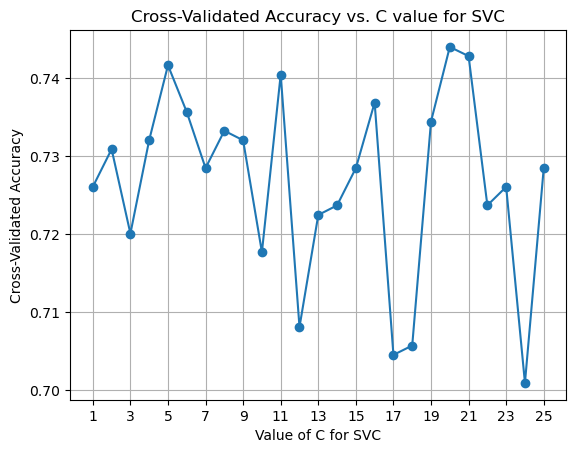

In [121]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(1, 27, 2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=linear C=(3 to 5),C=(9 to 11),C=(20 to 21) gives the maximized accuracy scores around 74% to 75%

In [196]:
svm_model = svm.SVC()

In [197]:
C_range = list(np.arange(3, 5, 0.1)) + list(np.arange(9, 11, 0.1)) + list(np.arange(20, 21, 0.1))

In [198]:
tuned_parameters = {
    'C': C_range,
    'kernel': ['linear']
}

In [200]:
model_svm = GridSearchCV(svm_model, tuned_parameters, cv=3, scoring='accuracy')
model_svm.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [3.0, 3.1, 3.2, 3.3000000000000003,
                               3.4000000000000004, 3.5000000000000004,
                               3.6000000000000005, 3.7000000000000006,
                               3.8000000000000007, 3.900000000000001,
                               4.000000000000001, 4.100000000000001,
                               4.200000000000001, 4.300000000000001,
                               4.400000000000001, 4.500000000000002,
                               4.600000000000001, 4.700000000000001,
                               4.800000000000002, 4.900000000000002, 9.0, 9.1,
                               9.2, 9.299999999999999, 9.399999999999999,
                               9.499999999999998, 9.599999999999998,
                               9.699999999999998, 9.799999999999997,
                               9.899999999999997, ...],
                         'kernel': ['linear']},
             scoring='accuracy')

In [201]:
print("Best parameters found: ", model_svm.best_params_)

Best parameters found:  {'C': 3.0, 'kernel': 'linear'}


In [202]:
print("Best cross-validation score: {:.2f}".format(model_svm.best_score_))

Best cross-validation score: 0.82


In [203]:
train_score_svm_tune=model_svm.best_estimator_.score(x_train,y_train)
train_score_svm_tune

0.8278443113772455

Svm is the better model than random forest,decision tree and logistic regression with 

In [122]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.5155260906757912, 0.513095238095238, 0.5190903906472768, 0.5071214713430282, 0.5011405759908754, 0.4975548902195609, 0.4903692614770458, 0.483183632734531, 0.4843741089250072, 0.4855788423153694, 0.4843741089250072, 0.483176504134588, 0.4843741089250072, 0.4879597946963218, 0.4855645851154833, 0.47718135158254926, 0.47598374679213007, 0.47239093242087266, 0.46999572284003427, 0.4640076988879384, 0.4640076988879384, 0.46640290846877674, 0.4640076988879384, 0.4616124893071, 0.46161248930710014]


In [123]:
np.mean(acc_score)

0.4839874536641004

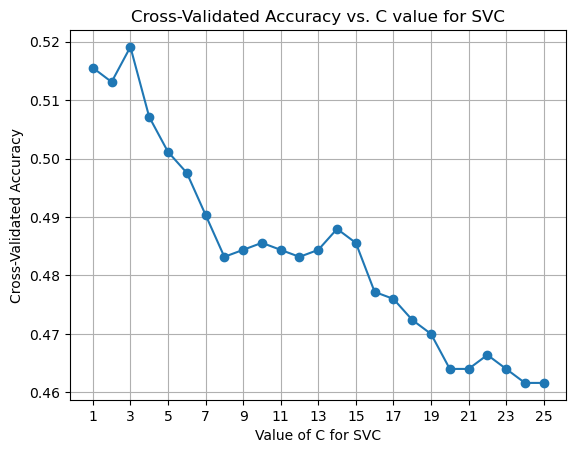

In [124]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(1, 27, 2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=rbf C=(1 to 3) gives the maximized accuracy score almost 52%

In [128]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, x_smote, y_smote, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.5011976047904192, 0.49880239520958086, 0.5023880809808954, 0.5047832905617337, 0.5059737667522098]


In [129]:
np.mean(acc_score)

0.5026290276589678

Text(0, 0.5, 'Cross-Validated Accuracy')

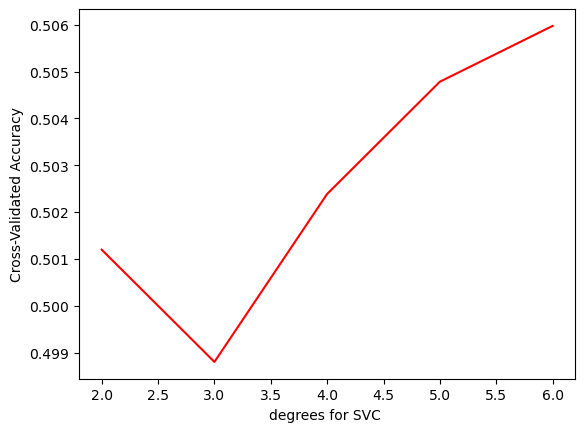

In [130]:
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

For kernal=poly C=(3 to 6) gives the maximized accuracy scores around 50% 

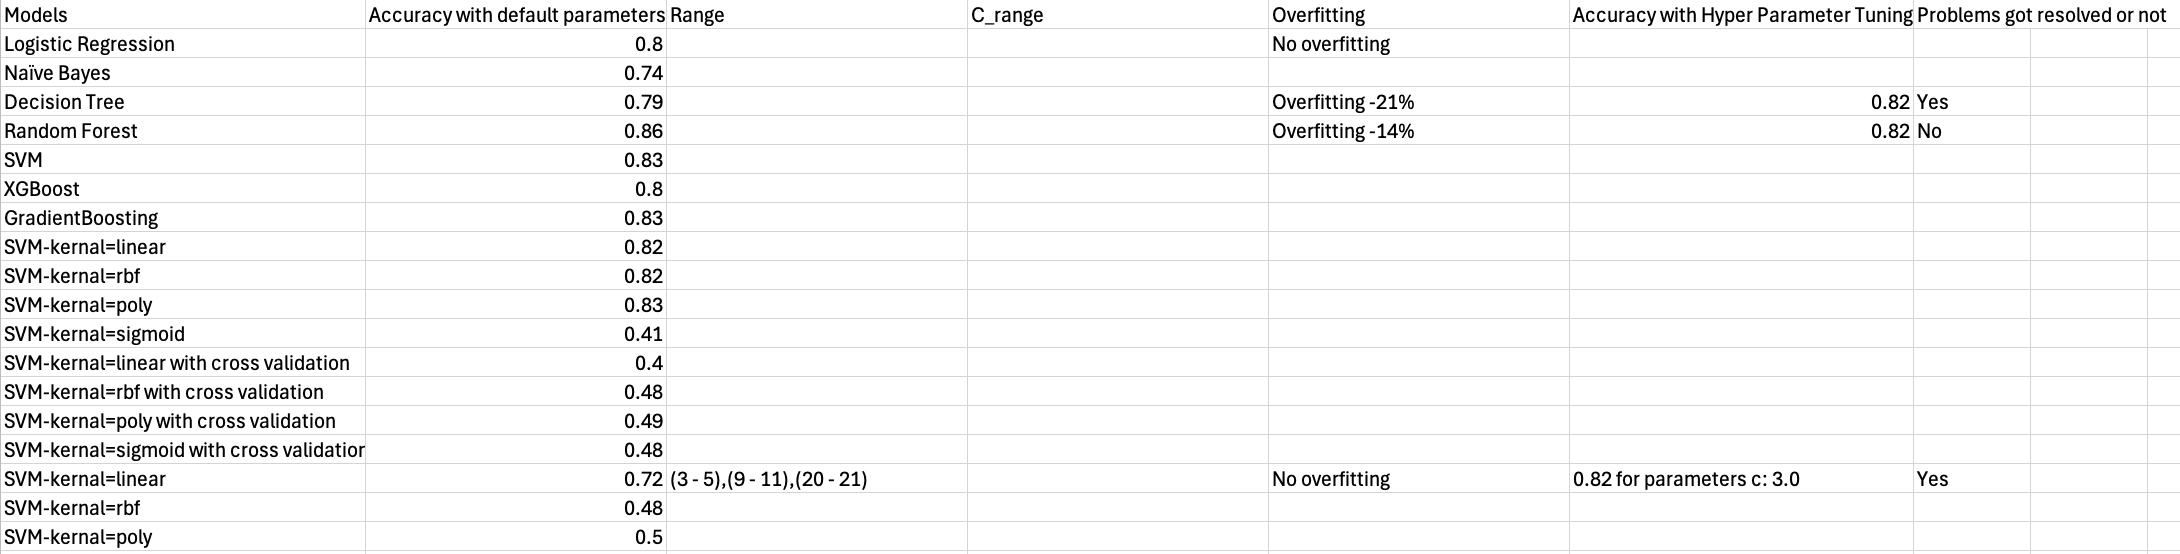